In [1]:
from scipy import signal
# Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html
from scipy.fft import fft, fftfreq
from scipy.fftpack import fftshift, ifftshift
import dash
from dash import Dash, dcc, html, Input, Output
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas
import plotly
import plotly.express as px
import plotly.graph_objs as go
import dash_bootstrap_components as dbc
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import IntRangeSlider, widgets, Layout, HBox, VBox
from IPython.display import display, clear_output
print("Libraries added successfully!")

Libraries added successfully!


In [2]:
s=2
print('s =',s)

s = 2


In [3]:
v=np.array([1,5,9])
print('v =',v)

v = [1 5 9]


In [4]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
print('a =',a)

a = [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [5]:
a+5

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [6]:
b=s*v*2
print('b=',b)

b= [ 4 20 36]


In [7]:
np.multiply(v,b)

array([  4, 100, 324])

In [8]:
len(v)

3

In [9]:
a.shape   # για array: np.array(a.shape)

(3, 3)

In [10]:
a[0,1]

2

In [11]:
a[1,-1]

6

In [12]:
v1 = v[1:3]
v2 = v[1:2]
print('v1 =',v1)
print('v2 =',v2)

v1 = [5 9]
v2 = [5]


In [13]:
a[0:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
t=np.arange(0,0.5,0.1)
print('t=',t)

t= [0.  0.1 0.2 0.3 0.4]


In [15]:
# Parameters
fs = 1000  # Sampling frequency in Hz
T = 1 / fs  # Sampling period
L = 1000  # Number of samples
t = np.arange(0, L) * T  # Create time vector

def update_plot(selected_frequencies):
    # Generate the signal with the selected frequencies
    signal = np.zeros(len(t))
    for f in range(selected_frequencies[0], selected_frequencies[1] + 1):
        signal += np.sin(2 * np.pi * f * t)

    # Calculate the FFT of the original signal
    original_signal_fft = fft(signal)
    # Calculate frequencies for the FFT of the original signal
    original_freqs = fftfreq(L, T)[:L // 2]
    # Calculate magnitude of Fourier coefficients (amplitude) for the original signal
    original_magnitude = np.abs(original_signal_fft)[:L // 2]
    
    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Original signal plot
    axs[0].plot(t, signal, color='#00CC96')
    axs[0].set_title('Original Signal')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Fourier Transform plot
    axs[1].plot(original_freqs, original_magnitude)
    axs[1].set_title('Fourier Transformation of Original Signal')
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)
    
    plt.tight_layout()
    return fig

# Create the slider widget
frequency_slider = IntRangeSlider(
    value=[5, 10],
    min=1,
    max=50,
    step=1,
    description='Frequency Range (Hz)',
    style={'description_width': 'initial'},
    layout=Layout(width='90%'),
    continuous_update=False
)

# Output widget for the plots
graph_output = widgets.Output()

def response(change):
    with graph_output:
        clear_output(wait=True)  # Clear the previous plot
        fig = update_plot(frequency_slider.value)
        plt.show()

# Observe changes in the slider and update the plot accordingly
frequency_slider.observe(response, names='value')

# Initial call to display the plot
response(None)

# Style the HTML element
html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Signal and Fourier Transformation</h2>
    """
)

# Display the slider and the outputs
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center', width='100%')
ui = widgets.VBox([html_label,
              frequency_slider,
              graph_output], layout=vbox_layout)

out = widgets.interactive_output(update_plot, {'selected_frequencies': frequency_slider})

clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [16]:
# Παράμετροι δειγματοληψίας
T = 1 / fs  # Sampling period
L = 1000  # Number of samples

# Create time vector
t = np.arange(0, L) * T

def plot_sampled_signal(f_range, n_samples):
    # Generate the signal with the selected frequencies
    signal = np.zeros(len(t))
    for f in range(f_range[0], f_range[1] + 1):
        signal += np.sin(2 * np.pi * f * t)
    
   # Correct downsampling approach
    sample_rate = n_samples  # Directly using selected_samples as an integer
    downsampling_factor = int(fs / sample_rate)  # Downsampling factor

    # Select every nth sample from the original time vector to match the downsampled signal
    sample_points = t[::downsampling_factor]

    # Downsample the signal by selecting every nth sample
    downsampled_signal = signal[::downsampling_factor]

    # Recalculate L for the downsampled signal if needed
    L_downsampled = len(downsampled_signal)

    # Calculate the DFT of the downsampled signal
    sampled_signal_fft = fft(downsampled_signal)

    # Calculate frequencies for the FFT of the downsampled signal
    # Note: The new sampling period is the inverse of the new sampling rate
    sampled_freqs = fftfreq(L_downsampled, 1/sample_rate)[:L_downsampled // 2]

    # Calculate magnitude of Fourier coefficients (amplitude) for the downsampled signal
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    n = len(downsampled_signal)
    T = 1 / sample_rate  # Recalculate the sampling period with the selected sample rate

    # After calculating the magnitude of Fourier coefficients
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    # Create a new frequency vector that includes the replicated frequencies
    # First, calculate the original frequency bins for the positive frequencies
    original_sampled_freqs = fftfreq(L_downsampled, T)[:L_downsampled // 2]

    shifted_freqs_negative = original_sampled_freqs - 1/T  # Shift for -1/Ts
    shifted_freqs_positive = original_sampled_freqs + 1/T  # Shift for +1/Ts

    # Concatenate the original and shifted (replicated) frequencies and magnitudes
    # This includes the original frequencies, and the replications at -1/Ts and +1/Ts
    replicated_freqs = np.concatenate([shifted_freqs_negative, original_sampled_freqs, shifted_freqs_positive])
    replicated_magnitude = np.concatenate([sampled_magnitude, sampled_magnitude, sampled_magnitude])

    # Sort the replicated frequencies and magnitudes in ascending order for proper plotting
    sorted_indices = np.argsort(replicated_freqs)
    sorted_replicated_freqs = replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]
    
    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    axs[0].scatter(sample_points, downsampled_signal, color='#00CC96', s=12)
    axs[0].set_title('Sampled Signal')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    axs[1].plot(sorted_replicated_freqs, sorted_replicated_magnitude, color='#1F77B4')
    axs[1].set_title('Fourier Transformation of Sampled Signal')
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)  

    plt.tight_layout()
    plt.show()

# Widgets
frequency_slider = widgets.IntRangeSlider(
    value=[5, 10],
    min=1,
    max=50,
    step=1,
    description='Frequency Range (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

samples_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=1000,
    step=25,
    description='Samples:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Signal and Fourier Transformation</h2>
    """
)

vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')
ui = widgets.VBox([html_label, frequency_slider, samples_slider], layout=vbox_layout)

out = widgets.interactive_output(plot_sampled_signal, {'f_range': frequency_slider, 'n_samples': samples_slider})

clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [17]:
# Παράμετροι δειγματοληψίας
T = 1 / fs  # Sampling period
L = 1000  # Number of samples

# Create time vector
t = np.arange(0, L) * T

def plot_sampled_signal(selected_frequencies, selected_samples):
    # Generate the signal with the selected frequencies
    signal = np.zeros(len(t))
    for f in range(selected_frequencies[0], selected_frequencies[1] + 1):
        signal += np.sin(2 * np.pi * f * t)
    
   # Correct downsampling approach
    sample_rate = selected_samples  # Directly using selected_samples as an integer
    downsampling_factor = int(fs / sample_rate)  # Downsampling factor

    # Downsample the signal by selecting every nth sample
    downsampled_signal = signal[::downsampling_factor]

    # Recalculate L for the downsampled signal if needed
    L_downsampled = len(downsampled_signal)

    # Calculate the DFT of the downsampled signal
    sampled_signal_fft = fft(downsampled_signal)

    # Calculate magnitude of Fourier coefficients (amplitude) for the downsampled signal
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    n = len(downsampled_signal)
    T = 1 / sample_rate  # Recalculate the sampling period with the selected sample rate

    # After calculating the magnitude of Fourier coefficients
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    # Create a new frequency vector that includes the replicated frequencies
    # First, calculate the original frequency bins for the positive frequencies
    original_sampled_freqs = fftfreq(L_downsampled, T)[:L_downsampled // 2]

    shifted_freqs_negative = original_sampled_freqs - 1/T  # Shift for -1/Ts
    shifted_freqs_positive = original_sampled_freqs + 1/T  # Shift for +1/Ts

    # Concatenate the original and shifted (replicated) frequencies and magnitudes
    # This includes the original frequencies, and the replications at -1/Ts and +1/Ts
    replicated_freqs = np.concatenate([shifted_freqs_negative, original_sampled_freqs, shifted_freqs_positive])
    replicated_magnitude = np.concatenate([sampled_magnitude, sampled_magnitude, sampled_magnitude])

    # Sort the replicated frequencies and magnitudes in ascending order for proper plotting
    sorted_indices = np.argsort(replicated_freqs)
    sorted_replicated_freqs = replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Generate an array of sample indices for the downsampled signal
    sample_indices = np.arange(len(downsampled_signal))

    # Normalize the frequency values
    normalized_freqs = original_sampled_freqs / (1/T)

    # Since you previously concatenated and sorted for replication, ensure to apply normalization there as well
    normalized_replicated_freqs = np.concatenate([
        (shifted_freqs_negative / (1/T)),  # Normalize -1/Ts shifted frequencies
        normalized_freqs,  # Already normalized original frequencies
        (shifted_freqs_positive / (1/T))   # Normalize +1/Ts shifted frequencies
    ])

    # Sort the normalized and replicated frequencies for proper plotting
    sorted_indices = np.argsort(normalized_replicated_freqs)
    sorted_normalized_replicated_freqs = normalized_replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Create the plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot the downsampled signal
    axs[0].scatter(sample_indices, downsampled_signal, color='#00CC96', s=12)
    axs[0].set_title('Sampled Signal')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)

    # Plot the Fourier Transform of the downsampled signal
    axs[1].plot(sorted_normalized_replicated_freqs, sorted_replicated_magnitude, color='#1F77B4')
    axs[1].set_title('Normalized Fourier Transformation of Sampled Signal')
    axs[1].set_xlabel('Normalized Frequency (f/fs)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# IPyWidgets sliders
frequency_slider = widgets.IntRangeSlider(
    value=[5, 10],
    min=1,
    max=50,
    step=1,
    description='Frequency range (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

samples_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=1000,
    step=25,
    description='Samples:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Signal and Fourier Transformation</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')
ui = widgets.VBox([html_label, frequency_slider, samples_slider], layout=vbox_layout)

# Interaction between widgets and function
out = widgets.interactive_output(
    plot_sampled_signal, 
    {'selected_frequencies': frequency_slider, 'selected_samples': samples_slider}
)

clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [18]:
# Παράμετροι δειγματοληψίας
T = 1 / fs  # Sampling period
L = 1000  # Number of samples

# Create time vector
t = np.arange(0, L) * T

def plot_signals(f_range, samples, selected_N):
    # Generate the signal with the selected frequencies
    signal = np.zeros(len(t))
    for f in range(f_range[0], f_range[1] + 1):
        signal += np.sin(2 * np.pi * f * t)
    
   # Correct downsampling approach
    sample_rate = samples  # Directly using samples as an integer
    downsampling_factor = int(fs / sample_rate)  # Downsampling factor

    # Downsample the signal by selecting every nth sample
    downsampled_signal = signal[::downsampling_factor]

    # Recalculate L for the downsampled signal if needed
    L_downsampled = len(downsampled_signal)

    # Calculate the DFT of the downsampled signal
    sampled_signal_fft = fft(downsampled_signal)

    # Calculate magnitude of Fourier coefficients (amplitude) for the downsampled signal
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    n = len(downsampled_signal)
    T = 1 / sample_rate  # Recalculate the sampling period with the selected sample rate

    # After calculating the magnitude of Fourier coefficients
    sampled_magnitude = np.abs(sampled_signal_fft)[:L_downsampled // 2]

    # Create a new frequency vector that includes the replicated frequencies
    # First, calculate the original frequency bins for the positive frequencies
    original_sampled_freqs = fftfreq(L_downsampled, T)[:L_downsampled // 2]

    shifted_freqs_negative = original_sampled_freqs - 1/T  # Shift for -1/Ts
    shifted_freqs_positive = original_sampled_freqs + 1/T  # Shift for +1/Ts

    # Concatenate the original and shifted (replicated) frequencies and magnitudes
    # This includes the original frequencies, and the replications at -1/Ts and +1/Ts
    replicated_freqs = np.concatenate([shifted_freqs_negative, original_sampled_freqs, shifted_freqs_positive])
    replicated_magnitude = np.concatenate([sampled_magnitude, sampled_magnitude, sampled_magnitude])

    # Sort the replicated frequencies and magnitudes in ascending order for proper plotting
    sorted_indices = np.argsort(replicated_freqs)
    sorted_replicated_freqs = replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Generate an array of sample indices for the downsampled signal
    sample_indices = np.arange(len(downsampled_signal))

    # Normalize the frequency values
    normalized_freqs = original_sampled_freqs / (1/T)

    # Since you previously concatenated and sorted for replication, ensure to apply normalization there as well
    normalized_replicated_freqs = np.concatenate([
        (shifted_freqs_negative / (1/T)),  # Normalize -1/Ts shifted frequencies
        normalized_freqs,  # Already normalized original frequencies
        (shifted_freqs_positive / (1/T))   # Normalize +1/Ts shifted frequencies
    ])

    # Sort the normalized and replicated frequencies for proper plotting
    sorted_indices = np.argsort(normalized_replicated_freqs)
    sorted_normalized_replicated_freqs = normalized_replicated_freqs[sorted_indices]
    sorted_replicated_magnitude = replicated_magnitude[sorted_indices]

    # Adjust the sampling interval for selecting frequencies and magnitudes
    sampled_indices = np.arange(0, len(sorted_normalized_replicated_freqs), selected_N)
    sampled_normalized_replicated_freqs = sorted_normalized_replicated_freqs[sampled_indices]
    sampled_replicated_magnitude = sorted_replicated_magnitude[sampled_indices]
    
    # Create the plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Time-domain signal plot
    axs[0].scatter(sample_indices, downsampled_signal, color='#00CC96', s=12)
    axs[0].set_title('Sampled Signal')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)

    
    axs[1].stem(sampled_normalized_replicated_freqs, sampled_replicated_magnitude, linefmt='#1F77B4', markerfmt='o', basefmt=" ")
    axs[1].set_title('Sampled Normalized Fourier Transformation')
    axs[1].set_xlabel('Normalized Frequency (f/fs)')
    axs[1].set_ylabel('Magnitude')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Define interactive widgets
frequency_slider = widgets.IntRangeSlider(
    value=[5, 40],
    min=1,
    max=51,
    step=1,
    description='Frequency range (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}
)

samples_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=1000,
    step=25,
    description='Samples:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}
)

N_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=25,
    step=1,
    description='N:',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Signal and Fourier Transformation</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')
ui = widgets.VBox([html_label, frequency_slider, samples_slider, N_slider], layout=vbox_layout)
out = widgets.interactive_output(plot_signals, {'f_range': frequency_slider, 'samples': samples_slider, 'selected_N': N_slider})

# Display the widgets and output
clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

In [19]:
# Callback function to update graphs
def update_graph(selected_frequencies, selected_Fo):
    # Part 1: Create the signal
    Fs = selected_frequencies        # Sampling frequency 1000 Hz
    Ts = 1 / Fs                      # Sampling period
    L = 1000                         # Length of signal (number of samples)
    T = L * Ts                       # Duration of signal
    t = np.arange(0, (L - 1) * Ts, Ts)  # Time vector

    global x 
    x = np.sin(2 * np.pi * (selected_Fo-30) * t) \
        + 0.8 * np.sin(2 * np.pi * (selected_Fo+20) * (t - 2)) \
        + np.sin(2 * np.pi * selected_Fo * t)  # 60 Hz component
    
    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(12, 20))
    
    # Time domain plot
    axs[0].plot(t, x, color='#00CC96')
    axs[0].set_title('Time domain plot of x')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Fourier transform
    def nextpow2(i):
        n = 1
        while n < i:
            n *= 2
        return n

    N = nextpow2(L)                 # Length of Fourier transform
    Fo = Fs / N                     # Frequency resolution
    f = np.arange(0, N) * Fo        # Frequency vector
    X = np.fft.fft(x, N)            # Compute DFT for N points

    # Frequency domain plot
    axs[1].plot(f[1:N], abs(X[1:N]), color='#1F77B4')
    axs[1].set_title('Frequency domain plot of x')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)

    # Shift frequencies to center
    f = f - Fs / 2
    X = np.fft.fftshift(X)

    # Two-sided spectrum of x
    f_shifted = f 

    # Two-sided spectrum plot
    axs[2].plot(f_shifted, abs(X), color='#1F77B4')
    axs[2].set_title('Two sided spectrum of x')
    axs[2].set_xlabel('f (Hz)')
    axs[2].set_ylabel('Amplitude')
    axs[2].grid(True)

    # Calculate power
    power = np.multiply(X, np.conj(X)) / N / L

    # Periodogram plot
    axs[3].plot(f_shifted, power.real, color='#1F77B4')
    axs[3].set_title('Periodogram')
    axs[3].set_xlabel('Frequency (Hz)')
    axs[3].set_ylabel('Power')
    axs[3].grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive widgets
frequency_slider = widgets.IntSlider(
    min=100,
    max=2000,
    step=100,
    value=1000,
    description='Sampling Frequency (Fs):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

Fo_slider = widgets.IntSlider(
    min=40,
    max=400,
    step=10,
    value=100,
    description='Frequency (Fo):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Μέρος 3: Part 1</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, frequency_slider, Fo_slider], layout=vbox_layout)
out = widgets.interactive_output(update_graph, {'selected_frequencies': frequency_slider, 'selected_Fo': Fo_slider})

# Display the widgets and output
clear_output(wait=True)  # Clear the previous plot
display(ui, out)


Output()

Output()

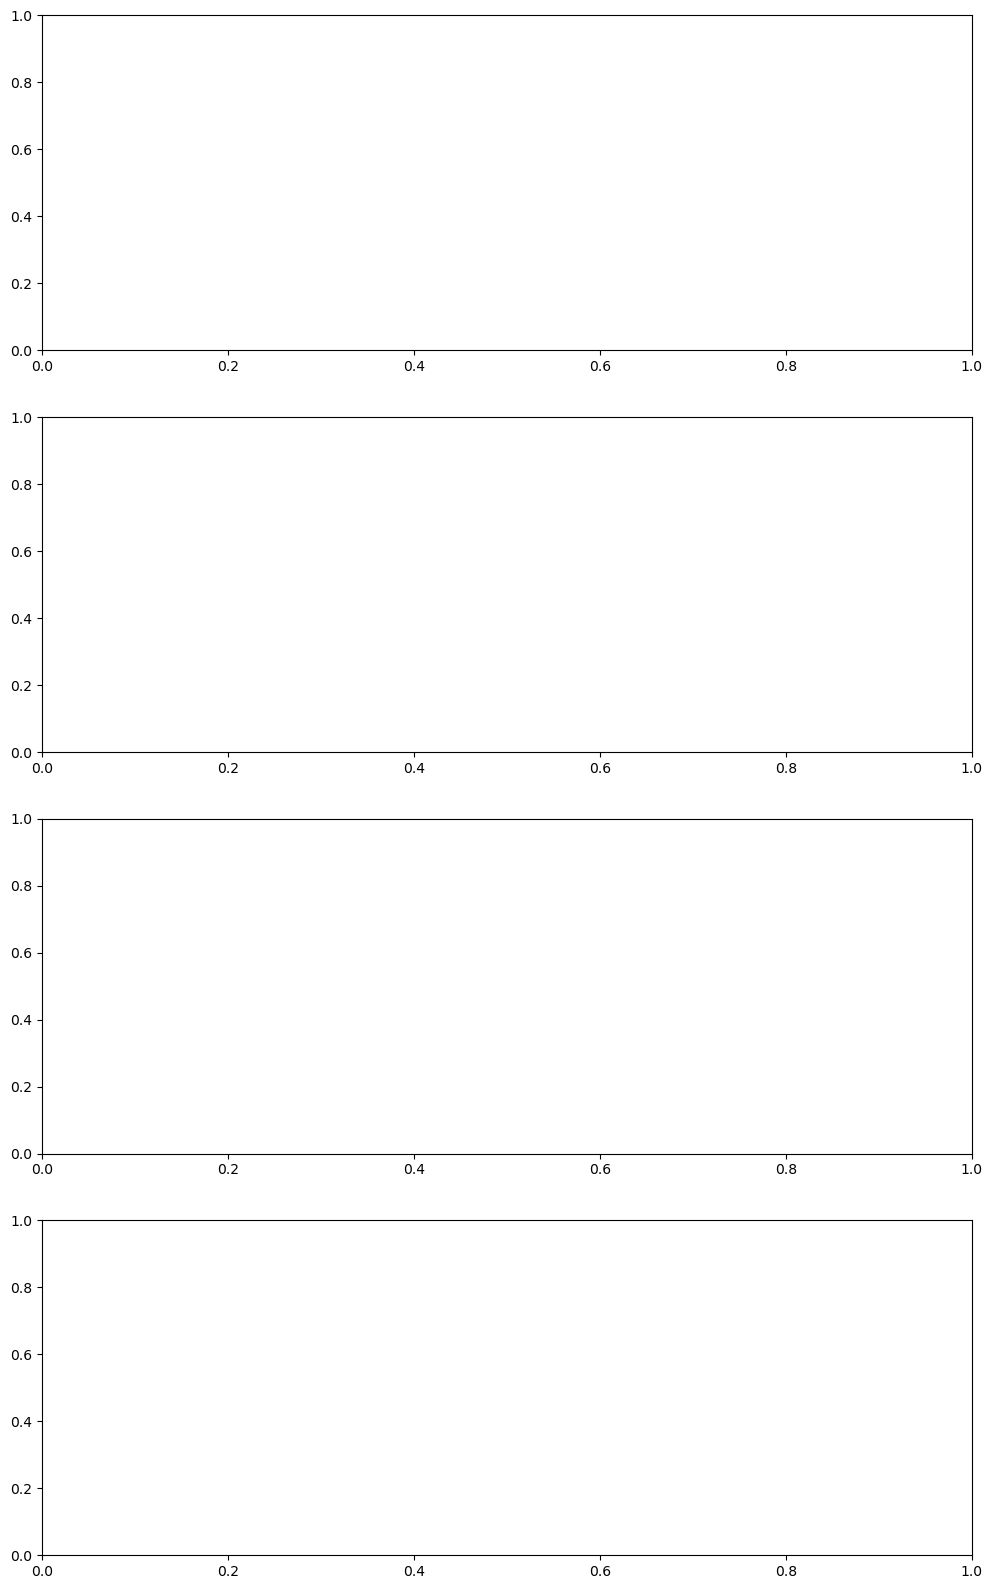

In [20]:
# Part 2 Προσθέστε θόρυβο στο σήμα

# Συμπληρώστε τον κώδικα για τη δημιουργία του σήματος θορύβου n με τη βοήθεια της συνάρτησης randn.
# Το διάνυσμα θορύβου n θα πρέπει να είναι του ίδιου μεγέθους με αυτό της ημιτονοειδούς κυματομορφής x του πρώτου μέρους.
# Σχεδιάστε το σήμα θορύβου στο διάστημα από 0 έως 0.2 sec και κλίμακα σε από -2 έως 2.
# Υπολογίστε το περιοδόγραμμα του n και σχεδιάστε την πυκνότητα φάσματος ισχύος του σήματος θορύβου.
# Προσθέστε το σήμα θορύβου και το x για να λάβετε το σήμα με θόρυβο s.
# Σχεδιάσατε το σήμα με θόρυβο s στο πεδίο του χρόνου στην περιοχή 0 έως 0.2 sec 
# και κλίμακα από -2 έως 2 καθώς και το αμφίπλευρο φάσμα του.


def nextpow2(i):
    # Compute the next highest power of 2
    n = 1
    while n < i: n *= 2
    return n


x=np.sin(2*np.pi*30*t) \
+ 0.8*np.sin(2*np.pi*80*(t-2)) \
+ np.sin(2*np.pi*60*t);                # συνιστώσα 60 Hz

# Function to update plots
def update_plots(selected_frequencies):
    Fs = selected_frequencies        # Sampling frequency 1000 Hz
    Ts = 1 / Fs                      # Sampling period
    L = 1000                         # Length of signal (number of samples)
    T = L * Ts                       # Duration of signal
    t = np.arange(0, (L - 1) * Ts, Ts)  # Time vector
    
    rand_n = np.random.randn(np.size(x))
    
    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(12, 20))

    # Time domain plot of n
    axs[0].plot(t, rand_n, color='#00CC96')
    axs[0].set_title('Time domain plot of n')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Correction for N calculation using bitwise operator
    N = 2^nextpow2(L)
    Fo = Fs / N   
    f = (np.arange(0, N)) * Fo
    f_shifted = f - Fs/2
    rand_N = np.fft.fft(rand_n, N)
    rand_N = np.fft.fftshift(rand_N)
    power_n = np.multiply(rand_N, np.conj(rand_N)) / N / L
    # Frequency domain plot of x
    axs[1].plot(f_shifted, power_n.real, color='#1F77B4')
    axs[1].set_title('Frequency domain plot of x')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)
    
    # Two sided spectrum of x
    s = x + rand_n
    axs[2].plot(t, s, color='#00CC96')
    axs[2].set_title('Two sided spectrum of x')
    axs[2].set_xlabel('t (sec)')
    axs[2].set_ylabel('Amplitude')
    axs[2].grid(True)
    
    # Two sided spectrum of s
    S = np.fft.fft(s, N)
    S = np.fft.fftshift(S)
    axs[3].plot(f_shifted, np.abs(S), color='#1F77B4')
    axs[3].set_title('Two sided spectrum of s')
    axs[3].set_xlabel('f (Hz)')
    axs[3].set_ylabel('Magnitude')
    axs[3].grid(True)
    
    plt.tight_layout()
    plt.show()

# Create the slider widget
fs_slider = widgets.IntSlider(
    value=1000,
    min=100,
    max=2000,
    step=100,
    description='Sampling Frequency (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Μέρος 3: Part 2</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, frequency_slider], layout=vbox_layout)
out = widgets.interactive_output(update_plots, {'selected_frequencies': frequency_slider})

# Display the slider
clear_output(wait=True)  # Clear the previous plot
display(ui,out)


Output()

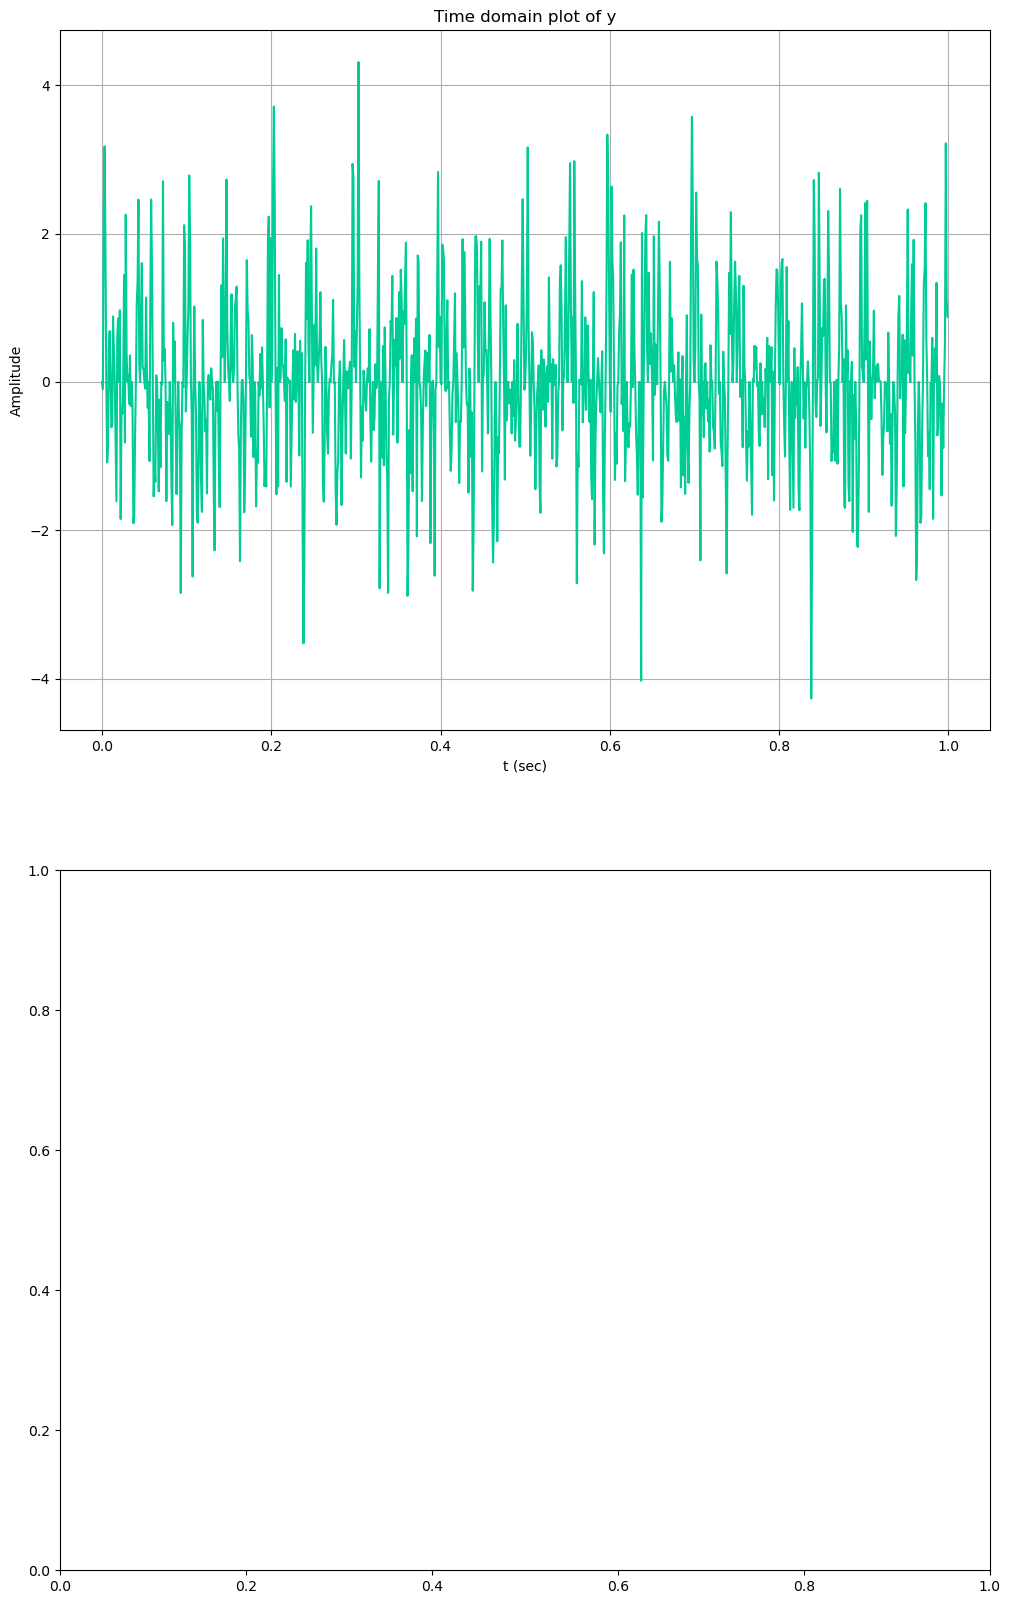

In [21]:
# Part 3. Πολλαπλασιασμός σημάτων

# Συμπληρώστε τον κώδικα δημιουργίας ενός ημιτονοειδούς σήματος συχνότητας
# 100 Hz και πολλαπλασιάστε με το προηγούμενο σήμα s.
# Τα δύο σήματα θα πρέπει να είναι του ίδιου μεγέθους.
# Σχεδιάστε το αποτέλεσμα στο πεδίο του χρόνου στην περιοχή 0 έως 0.2 sec
# και κλίμακα από -2 έως 2 καθώς και στο πεδίο της συχνότητας
# χρησιμοποιώντας τη συνάρτηση fftshift.

def update_plots(selected_frequencies):
    Fο=selected_frequencies
    z=np.sin(2*np.pi*Fο*t)
    x = np.sin(2 * np.pi * 30 * t) \
        + 0.8 * np.sin(2 * np.pi * 80 * (t - 2)) \
        + np.sin(2 * np.pi * 60 * t)  # 60 Hz component
    L = 1000  # Length of signal
    rand_n = np.random.normal(0, 1, L)  # Example random noise
    s = x + rand_n
    y= np.multiply(z,s)

    # Plotting
    fig, axs = plt.subplots(2, 1, figsize=(12, 20))

    # Time domain plot
    axs[0].plot(t, y, color='#00CC96')
    axs[0].set_title('Time domain plot of y')
    axs[0].set_xlabel('t (sec)')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)
    
    # Fourier transform
    def nextpow2(i):
        n = 1
        while n < i:
            n *= 2
        return n
            
    N = 2^nextpow2(L)
    Fo = Fs / N   
    f = (np.arange(0, N)) * Fo
    Y = np.fft.fft(y, N)
    f=f-Fs/2   
    Y = np.fft.fftshift(Y)

    axs[1].plot(f, np.abs(Y), color='#1F77B4')
    axs[1].set_title('Frequency domain plot of y')
    axs[1].set_xlabel('f (Hz)')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Create the slider widget for Fo
Fo_slider = widgets.IntSlider(
    value=100,
    min=10,
    max=200,
    step=10,
    description='Fo (Hz):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'},
    continuous_update=False
)

html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Μέρος 3: Part 3</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, Fo_slider], layout=vbox_layout)
out = widgets.interactive_output(update_plots, {'selected_frequencies': Fo_slider})

# Display the slider
clear_output(wait=True)  # Clear the previous plot
display(ui,out)


In [22]:
# Fourier transform
def nextpow2(i):
        n = 1
        while n < i:
            n *= 2
        return n

def pwelch(x,Fs):                    
    Ts=1/Fs                    
    L=np.size(x)+1                 
    T=L*Ts                     
    N = 2^nextpow2(L)
    Fo=Fs/N                   
    f=np.arange(0,N)*Fo       
     
    window_size = nextpow2(np.size(x)/8)
    if (window_size<256):
        window_size=256
    windows = np.size(x)//(window_size//2)-1
    indexer = np.arange(window_size)[None, :] + (window_size//2)*np.arange(windows)[:, None]
    windowed_x = x[indexer]

    avg_pwr=0
    for window in windowed_x:
        window = window * np.hanning(np.size(window))
        L=np.size(window)+1                 
        T=L*Ts                     
        N = 2^nextpow2(L)
        Fo=Fs/N                   
        f=np.arange(0,N)*Fo
        window_fft=np.fft.fft(window,N)
        power=np.multiply(window_fft,np.conj(window_fft))/N/L
        avg_pwr=avg_pwr+power
    avg_pwr=avg_pwr/windows

    """ fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(f[np.arange(0,N//2)],avg_pwr[np.arange(0,N//2)])
    ax.set(xlabel='Frequency (Hz)', ylabel='Power',
           title='Periodogram pwelch()')
    ax.grid()
    plt.show() """
    
    return f[np.arange(0,N//2)], avg_pwr[np.arange(0,N//2)]

In [23]:
# Function to update plots based on slider value
def update_plots(Fs):
    global x, t
    T = 1 / Fs  # Update sampling period
    t = np.arange(0, L) * T  # Update time vector
    
    # Recompute signal x with new sampling frequency
    x = np.sin(2 * np.pi * 30 * t) + 0.8 * np.sin(2 * np.pi * 80 * (t - 2)) + np.sin(2 * np.pi * 60 * t)
    
    # Compute pwelch
    f1, Pxx1 = pwelch(x, Fs)
    
    # Compute signal.welch
    f2, Pxx2 = signal.welch(x, fs=Fs)
    
    # Plot
    fig, axs = plt.subplots(2, 1, figsize=(18.5, 20))
    
    # Plot custom pwelch
    axs[0].plot(f1, Pxx1)
    axs[0].set(xlabel='Frequency (Hz)', ylabel='Power', title='Periodogram pwelch()')
    axs[0].grid()
    
    # Plot signal.welch
    axs[1].plot(f2, Pxx2)
    axs[1].set(xlabel='Frequency (Hz)', ylabel='Power', title='Periodogram signal.welch()')
    axs[1].grid()
    
    plt.tight_layout()
    plt.show()

# Create slider for Fs
Fs_slider = widgets.IntSlider(
    value=500,
    min=100,
    max=2000, 
    step=100,
    description='Sampling Frequency (Fs):',
    layout=Layout(width='90%'),
    style={'description_width': 'initial'}, 
    continuous_update=False
)


html_label = widgets.HTML(
    value="""
        <h2 style='font-weight: bold; font-size: 30px; text-align: center;'>Μέρος 4:</h2>
    """
)

# Display the sliders and output
vbox_layout = Layout(display='flex', flex_flow='column', align_items='center')

ui = widgets.VBox([html_label, Fs_slider], layout=vbox_layout)
out = widgets.interactive_output(update_plots, {'Fs': Fs_slider})

# Display the slider
clear_output(wait=True)  # Clear the previous plot
display(ui,out)

Output()